# First

## Tree Data structure

In [ ]:
import pandas as pd

In [ ]:
wines = pd.read_csv("https://bit.ly/wine-date")
wines.tail()

,alcohol,sugar,pH,class
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [ ]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wines.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wines.iloc[:, :3]
target = wines.iloc[:, 3]

data.shape, target.shape

((6497, 3), (6497,))

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

train_input.shape, test_input.shape

((5197, 3), (1300, 3))

데이터가 많으니 테스트 사이즈를 조금 줄여준다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression()

lrg.fit(train_scaled, train_target)

lrg.score(train_scaled, train_target), lrg.score(test_scaled, test_target)

(0.7808350971714451, 0.7776923076923077)

logistic regerssion으론 다소 과소적합이 발생함..

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(train_scaled, train_target)

dtc.score(train_scaled, train_target), dtc.score(test_scaled, test_target)

(0.996921300750433, 0.8592307692307692)

Decision Tree는 overfitting 이 잘 발생함.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dtc)
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(
    dtc,
    max_depth=1,
    filled=True,
    feature_names=[
        "alcohol", "sugar", "pH"
    ]
)
plt.show()

- gini : 지니 불순도 (pdf 참고)
- samples : 분류할 샘플의 개수
- value : 분류 label마다의 샘플 개수 -> 이전 노드에서 얼마나 잘 분류됐는지 확인 가능

depth를 제한해서 이해가능한 tree만들기

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(train_scaled, train_target)

dtc.score(train_scaled, train_target), dtc.score(test_scaled, test_target)

In [ ]:
plt.figure(figsize=(15, 9))
plot_tree(
    dtc,
    filled=True,
    feature_names=[
        "alcohol", "sugar", "pH"
    ]
)
plt.show()

각 노드의 색깔은 각 클래스가 차지하는 비율을 시각화 한 것임.
주황색에 가까울수록 레드 와인(라벨 0)의 비율이 큰 것을 알 수 있다.

decision tree에선 scale을 할 필요가 없음 (영향을 안끼침)

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(train_input, train_target)

dtc.score(train_input, train_target), dtc.score(test_input, test_target)

score 점수가 같은걸 알 수 있음

In [ ]:
plt.figure(figsize=(15, 9))
plot_tree(
    dtc,
    filled=True,
    feature_names=[
        "alcohol", "sugar", "pH"
    ]
)
plt.show()

In [ ]:
dtc.feature_importances_

각각 alcohol, sugar, pH임. sugar의 결정 중요도가 가장 높은 것을 알 수 있음

## 확인문제

4.앞서 결정 트리 예제에서 max_depth를 3으로 지정하여 좌우가 대칭인 트리를 만들었습니다. 사이
킷런의 결정 트리 클래스가 제공하는 매개변수 중 min_impurity_decrease를 사용해 가지치기를 해
보겠습니다. 어떤 노드의 정보 이득 × (노드의 샘플 수) / (전체 샘플 수) 값이 이 매개변수보다 작
으면 더 이상 분할하지 않습니다. 이 매개변수의 값을 0.0005로 지정하고 결정 트리를 만들어 보세
요. 좌우가 균일하지 않은 트리가 만들어지나요? 테스트 세트의 성능은 어떤가요?

In [ ]:
dtc = DecisionTreeClassifier(
    min_impurity_decrease=5e-4,
    random_state=42
)
dtc.fit(train_input, train_target)

dtc.score(train_input, train_target), dtc.score(test_input, test_target)

In [ ]:
plt.figure(figsize=(15, 9))
plot_tree(
    dtc,
    filled=True,
    feature_names=[
        "alcohol", "sugar", "pH"
    ]
)
plt.show()

# Second

## Validation Datas

In [ ]:
import pandas as pd

In [ ]:
wines = pd.read_csv('https://bit.ly/wine-date')
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
data = wines.iloc[:, 0:3]
target = wines.iloc[:, 3]

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
sub_input, valid_input, sub_target, valid_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

sub_input.shape, valid_input.shape, test_input.shape

((4157, 3), (1040, 3), (1300, 3))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(sub_input, sub_target)

dtc.score(sub_input, sub_target), dtc.score(valid_input, valid_target), dtc.score(test_input, test_target)

(0.9971133028626413, 0.864423076923077, 0.8569230769230769)

## k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
scores = cross_validate(dtc, train_input, train_target)

scores

{'fit_time': array([0.01574588, 0.03576064, 0.01876783, 0.01469326, 0.01366472]),
 'score_time': array([0.00959301, 0.01046848, 0.00418782, 0.00419545, 0.00382662]),
 'test_score': array([0.86826923, 0.85288462, 0.87680462, 0.85370549, 0.83830606])}

알아서 k-fold cross validation을 해주는 함수이다. 각 행은 validation을 바꿔가며 학습한 모델들이다.

In [ ]:
import numpy as np
np.mean(scores["test_score"], dtype=np.float128)

np.longdouble('0.85799400310949878177')

교차 검증의 최종 점수는 평균으로 나타냄

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dtc, train_input, train_target, cv=StratifiedKFold())
np.mean(scores["test_score"], dtype=float)

np.float64(0.8579952987339897)

분할기 지정 (기본이 stratifiedkfold임)

In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dtc, train_input, train_target, cv=splitter)
# scores = cross_validate(dtc, train_input, train_target, cv=10) 이랑 같다.

np.mean(scores["test_score"])

np.float64(0.8564554616866756)

## Grid Search : 하이퍼 파라미터의 케이스들을 탐색하며 좋은 조합을 발견

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "min_impurity_decrease" : [1e-4, 2e-4, 3e-4, 4e-4, 5e-4]
}

In [ ]:
gs = GridSearchCV(
      DecisionTreeClassifier(random_state=42), params, n_jobs=-1 # 갖고있는 모든 코어를 사용
    )
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
dtc = gs.best_estimator_
dtc.score(train_input, train_target), dtc.score(test_input, test_target)

(0.9615162593804117, 0.8653846153846154)

In [ ]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

In [ ]:
gs.cv_results_

{'mean_fit_time': array([0.03866544, 0.02961984, 0.02781291, 0.02990918, 0.03536153]),
 'std_fit_time': array([0.00773548, 0.00320786, 0.00482667, 0.00812029, 0.00303035]),
 'mean_score_time': array([0.01032195, 0.01039248, 0.00813222, 0.00914631, 0.01285954]),
 'std_score_time': array([0.00318009, 0.00357183, 0.00246672, 0.00128999, 0.00235603]),
 'param_min_impurity_decrease': masked_array(data=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'min_impurity_decrease': 0.0001},
  {'min_impurity_decrease': 0.0002},
  {'min_impurity_decrease': 0.0003},
  {'min_impurity_decrease': 0.0004},
  {'min_impurity_decrease': 0.0005}],
 'split0_test_score': array([0.86923077, 0.87115385, 0.86923077, 0.86923077, 0.86538462]),
 'split1_test_score': array([0.86826923, 0.86346154, 0.85961538, 0.86346154, 0.86923077]),
 'split2_test_score': array([0.8825794 , 0.87680462, 0.87584216, 0.88161694, 0.8825794 ]),
 'spli

In [ ]:
params = {
  'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
  'max_depth': range(5, 20, 1),
  'min_samples_split': range(2, 100, 10)
}

In [ ]:
gs = GridSearchCV(
      DecisionTreeClassifier(random_state=42), params, n_jobs=-1 # 갖고있는 모든 코어를 사용
    )
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
dtc = gs.best_estimator_
dtc.score(train_input, train_target), dtc.score(test_input, test_target)

(0.892053107562055, 0.8615384615384616)

In [ ]:
np.max(gs.cv_results_['mean_test_score'])

np.float64(0.8683865773302731)

## Random search

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
rgen = randint(0, 10)
rgen.rvs(10)

array([6, 8, 7, 3, 5, 1, 6, 9, 4, 7])

In [ ]:
np.unique(rgen.rvs(1000), return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 97,  88,  99, 113, 121,  89,  95, 102, 104,  92]))

In [ ]:
fgen = uniform(0, 1)
fgen.rvs(10)

array([0.89293742, 0.58512938, 0.83593809, 0.62048882, 0.61233445,
       0.70726851, 0.87733265, 0.64662021, 0.03242952, 0.59725393])

In [ ]:
params = {
    "min_impurity_decrease" : uniform(1e-4, 1e-3),
    "max_depth" : randint(20, 50),
    "min_samples_split" : randint(2, 25),
    "min_samples_leaf" : randint(1, 25)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rscv = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    n_iter=100,
    n_jobs=-1,
    random_state=42
)
rscv.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b94e4be2c60>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b94e4c80ad0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b94e4be3bc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b94e4be0770>},
                   random_state=42)

In [ ]:
rscv.best_params_

{'max_depth': 39,
 'min_impurity_decrease': np.float64(0.00034102546602601173),
 'min_samples_leaf': 7,
 'min_samples_split': 13}

In [ ]:
np.max(rscv.cv_results_["mean_test_score"])

np.float64(0.8695428296438884)

In [ ]:
dtc = rscv.best_estimator_
dtc.score(train_input, train_target), dtc.score(test_input, test_target)

(0.8928227823744468, 0.86)

## 확인문제 5-2

In [ ]:
rscv = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, splitter="random"), # 기본값은 "best"
    params,
    n_iter=100,
    n_jobs=-1,
    random_state=42
)
rscv.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b94e4be2c60>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b94e4c80ad0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b94e4be3bc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b94e4be0770>},
                   random_state=42)

In [ ]:
rscv.best_params_

{'max_depth': 43,
 'min_impurity_decrease': np.float64(0.00011407982271508446),
 'min_samples_leaf': 19,
 'min_samples_split': 18}

In [ ]:
np.max(rscv.cv_results_["mean_test_score"])

np.float64(0.8458726956392981)

In [ ]:
dtc = rscv.best_estimator_
dtc.score(train_input, train_target), dtc.score(test_input, test_target)

(0.8043101789493938, 0.786923076923077)

# Third

## 트리의 앙상블

**부트 스트랩 샘플**이 매우매우매우 중요하다!

In [1]:
import pandas as pd
import numpy as np

In [2]:
wines = pd.read_csv('https://bit.ly/wine-date')
wines.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wines.iloc[:, 0:3]
target = wines.iloc[:, 3]
data.head()

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51


In [5]:
from sklearn.model_selection import train_test_split

In [22]:
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42)

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rfc, train_input, train_target, return_train_score=True, n_jobs=-1)

In [25]:
np.mean(scores["train_score"]), np.mean(scores["test_score"])

(np.float64(0.997844759088341), np.float64(0.8914208392565683))

In [26]:
rfc.fit(train_input, train_target)
rfc.feature_importances_

array([0.23155241, 0.49706658, 0.27138101])

OOB : Out of Bag, 부트 스트래핑에서 선택되지 못한 데이터들

In [27]:
rfc = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rfc.fit(train_input, train_target)
rfc.oob_score_

0.8981937602627258

## Extra Trees(forest)

- Extremely Randomized Trees

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
etc = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(etc, train_input, train_target, return_train_score=True)
np.mean(scores["train_score"]), np.mean(scores["test_score"])

(np.float64(0.997844759088341), np.float64(0.8903937240035804))

## Gradient boosting

반드시 암기 ㅋㅋㅋㅋ

Random forest는 랜덤하게 뽑아서 학습함 -> tree끼리 독립적.

Gradient boosting algorithm은 한 트리가 잘 분류하지 못한 데이터들에 weight를 추가해서 다른 트리를 학습 시킴 -> 트리끼리 합쳐서 분류하면 좋은 분류기 탄생!!?

이때 overfitting을 줄이기 위해 깊이가 얕은 트리들을 사용한다.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gbc = GradientBoostingClassifier(random_state=42)
score = cross_validate(
    gbc,
    train_input,
    train_target,
    return_train_score=True,
    n_jobs=-1
)
np.mean(scores["train_score"]), np.mean(scores["test_score"])

(np.float64(0.997844759088341), np.float64(0.8903937240035804))

In [32]:
gbc = GradientBoostingClassifier(
    n_estimators=500, # 결정 트리의 개수
    learning_rate=0.2,
    random_state=42
)
score = cross_validate(
    gbc,
    train_input,
    train_target,
    return_train_score=True,
    n_jobs=-1
)
np.mean(scores["train_score"]), np.mean(scores["test_score"])

(np.float64(0.997844759088341), np.float64(0.8903937240035804))

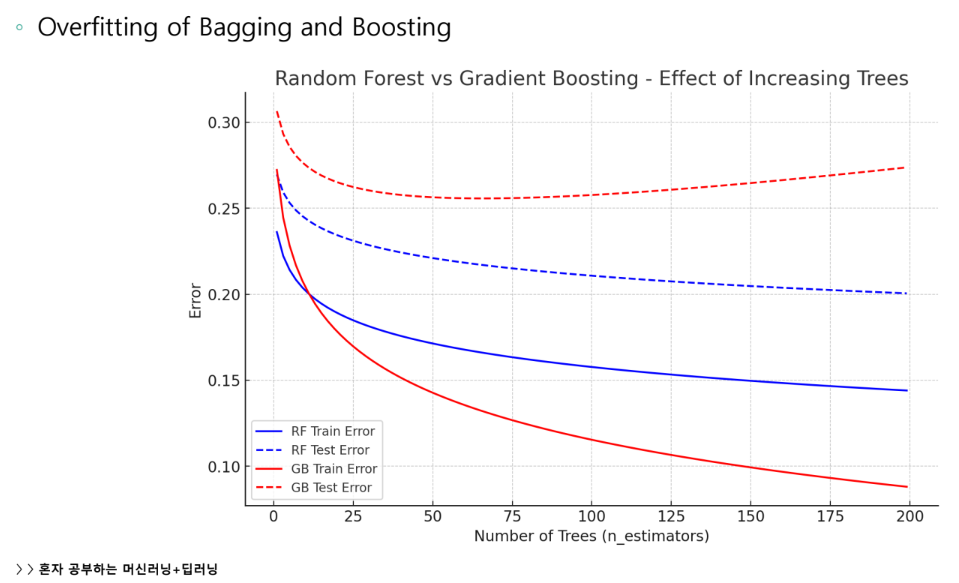

Random forest의 경우 Number of tree가 늘어도 트리의 깊이가 깊어지는 것이 아니다.

따라서 트리의 개수가 늘어도 overfitting이 크게 발생하지 않음.

반면, Gradient Boosting의 경우 트리의 개수가 늘면 깊이가 깊어져서 overfitting이 발생함

## Histogram based Gradient Boosting

입력 특성을 256개의 구간으로 나눠 노드를 분할할 때 최적의 분할을 빠르게 탐색.

In [34]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [35]:
hgbc = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(
    hgbc,
    train_input,
    train_target,
    return_train_score=True
)
np.mean(scores["train_score"]), np.mean(scores["test_score"])

(np.float64(0.9380129799494501), np.float64(0.8805410414363187))

Permutation Importation : 특정 특성을 무작위로 섞어버림 -> 그 특성이 얼마나 중요했는지 알 수 있음.

(random한 값을 쓰는게 아니라 특정 특성만 다른 애와 무작위로 바꾸는 것)

In [36]:
from sklearn.inspection import permutation_importance

In [37]:
hgbc = HistGradientBoostingClassifier(random_state=42)
hgbc.fit(train_input, train_target)

HistGradientBoostingClassifier(random_state=42)

In [39]:
result = permutation_importance(
    hgbc,
    train_input,
    train_target,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)
result.importances_mean

array([0.09144089, 0.23493432, 0.08760263])

In [40]:
result_test = permutation_importance(
    hgbc,
    train_input,
    train_target,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)
result_test.importances_mean

array([0.09144089, 0.23493432, 0.08760263])

In [41]:
hgbc.score(test_input, test_target)

0.8584615384615385

## Other libraries

- XGBoost
- LightGBM

In [42]:
from xgboost import XGBClassifier

In [43]:
xgbc = XGBClassifier(
    tree_method="hist",
    random_state=42
)
scores = cross_validate(
    xgbc,
    train_input,
    train_target,
    return_train_score=True,
    n_jobs=-1
)

In [44]:
np.mean(scores["train_score"]), np.mean(scores["test_score"])

(np.float64(0.9618227463917265), np.float64(0.8834147317432738))

In [45]:
from lightgbm import LGBMClassifier

In [47]:
lgbm = LGBMClassifier(random_state=42)
scores = cross_validate(
    lgbm,
    train_input,
    train_target,
    return_train_score=True,
    n_jobs=-1
)

In [48]:
np.mean(scores["train_score"]), np.mean(scores["test_score"])

(np.float64(0.9413484712095832), np.float64(0.8846461327857632))